In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import os
from datetime import datetime
from MCForecastTools import MCSimulation
import requests
import pandas_datareader as pdr
%matplotlib inline

In [2]:
# Function to Validate Tickers
def validateTick(tick):
    
    # Try Inputting into Yahoo Stocks
    try:
        pdr.DataReader(f'{tick}','yahoo',date)
    
    # Raise Error if Invalid
    except:
        raise ValueError("Ticker Not Valid.")
        
# Function to Validate Date
def validate(date_text):
    
    # Try Check on Format
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")

In [3]:
# Set Empty Dictionary
stock_dict = {}

# Set Empty List
stock_list = []

# Pick a Start Date
date = input("Pick a start date for your analysis (YYYY-MM-DD): ")
validate(date)

# While Loop to Pick Stocks
while (True):
    name = input("Add a stock ticker to the list: ").upper()
    validateTick(name)
    stock_dict[name] = date
    stock_list.append(name)
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2015-01-01
Add a stock ticker to the list:  MSFT
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  TSLA
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [4]:
def stockCreation(stock_dict, stock_list):
    func_list = []
    count = 0
    for key, value in stock_dict.items():
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        globals()[key].columns = [[key, key, key, key, key, key,],["high", "low", "open", "close", "volume", "adj_close"]]
        func_list.append(globals()[key])
    
    portfolio = func_list[0]
    
    if len(func_list) == 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True, suffixes=[f'_{stock_list[0]}', f'_{stock_list[1]}'])
    elif len(func_list) > 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True)
        for x in range(len(func_list)-2):
            portfolio = portfolio.merge(func_list[x + 2], left_index=True, right_index=True)

    portfolio_close = []       
    for x in range(len(stock_list)):
        portfolio_close.append(portfolio[stock_list[x]][f"adj_close"])
    
    portfolio_close = pd.DataFrame(portfolio_close)
    
    portfolio_close = portfolio_close.T
    
    portfolio_close.columns = stock_list
        
    return portfolio, portfolio_close

In [5]:
portfolio = stockCreation(stock_dict, stock_list)[0]
portfolio

MSFT                                                  \
                  high         low        open       close      volume   
Date                                                                     
2015-01-02   47.419998   46.540001   46.660000   46.759998  27913900.0   
2015-01-05   46.730000   46.250000   46.369999   46.330002  39673900.0   
2015-01-06   46.750000   45.540001   46.380001   45.650002  36447900.0   
2015-01-07   46.459999   45.490002   45.980000   46.230000  29114100.0   
2015-01-08   47.750000   46.720001   46.750000   47.590000  29645200.0   
...                ...         ...         ...         ...         ...   
2020-12-07  215.539993  212.990005  214.369995  214.289993  24620000.0   
2020-12-08  216.949997  212.889999  213.970001  216.009995  23284100.0   
2020-12-09  215.229996  211.210007  215.160004  211.800003  32440600.0   
2020-12-10  213.080002  210.360001  211.770004  210.520004  26733300.0   
2020-12-11  213.320007  209.110001  210.050003  213.259995  30972600.0   

                              TSLA                                      \
             adj_close        high         low        open       close   
Date                                                                     
2015-01-02   41.539135   44.650002   42.652000   44.574001   43.862000   
2015-01-05   41.157158   43.299999   41.431999   42.910000   42.018002   
2015-01-06   40.553074   42.840000   40.841999   42.012001   42.256001   
2015-01-07   41.068310   42.956001   41.956001   42.669998   42.189999   
2015-01-08   42.276463   42.759998   42.001999   42.562000   42.124001   
...                ...         ...         ...         ...         ...   
2020-12-07  214.289993  648.789978  603.049988  604.919983  641.760010   
2020-12-08  216.009995  651.280029  618.500000  625.510010  649.880005   
2020-12-09  211.800003  654.320007  588.000000  653.690002  604.479980   
2020-12-10  210.520004  627.750000  566.340027  574.369995  627.070007   
2020-12-11  213.259995  624.000000  596.799988  615.010010  609.989990   

                                    
                volume   adj_close  
Date                                
2015-01-02  23822000.0   43.862000  
2015-01-05  26842500.0   42.018002  
2015-01-06  31309500.0   42.256001  
2015-01-07  14842000.0   42.189999  
2015-01-08  17212500.0   42.124001  
...                ...         ...  
2020-12-07  56309700.0  641.760010  
2020-12-08  64265000.0  649.880005  
2020-12-09  71291200.0  604.479980  
2020-12-10  67083200.0  627.070007  
2020-12-11  46359600.0  609.989990  

[1498 rows x 12 columns]

In [6]:
portfolio_close = stockCreation(stock_dict, stock_list)[1]
portfolio_close

,MSFT,TSLA
Date,,
2015-01-02,41.539135,43.862000
2015-01-05,41.157158,42.018002
2015-01-06,40.553074,42.256001
2015-01-07,41.068310,42.189999
2015-01-08,42.276463,42.124001
...,...,...
2020-12-07,214.289993,641.760010
2020-12-08,216.009995,649.880005
2020-12-09,211.800003,604.479980


Sharpe Ratios

Definition: average return earned beyond the risk-free rate per unit of volatility, the measure of the price fluctuations of an asset. The greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.

Purpose: The ratio describes the compensation an investor will receive for the extra volatility endured when holding a riskier asset.

In [21]:
sharpe_input = portfolio_close.pct_change().dropna()

# Calculate annualized Sharpe Ratios
sharpe_ratios = (sharpe_input.mean()*252) / (sharpe_input.std()*np.sqrt(252))

# Show results
sharpe_ratios

MSFT    1.126811
TSLA    1.079039
dtype: float64

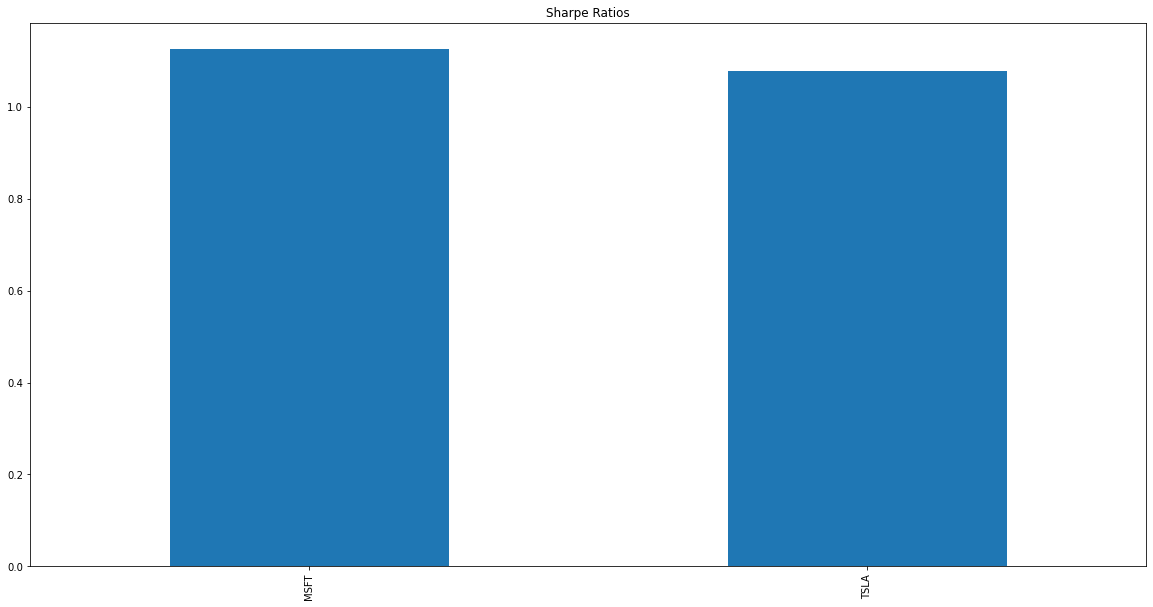

In [22]:
# Initialize new figure
plt.figure()

# Visualize Sharpe Ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize = (20,10), title="Sharpe Ratios");